Created on Tuesday 05 January 2021

Group 5 - Classification

@authors : FB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/G5 Inter-Promo 2021/Données/Input")

Mounted at /content/drive


In [ ]:
ls

 BOW.csv     Data_With_Features_Syntax.csv       TF-IDF.csv
 Data.json  'Description du fichier Data.gdoc'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('Data_With_Features_Syntax.csv', index_col=1)
data.drop('Unnamed: 0', axis=1, inplace=True) 
data.fillna('', inplace=True)
data.head()

,art_content,art_content_html,art_extract_datetime,art_lang,art_title,art_url,src_name,src_type,src_url,src_img,art_auth,art_tag,Nb_key_words,Nb_key_words_title,Nb_words,Nb_words_title,Nb_sentences,average_word_sentence,ratio_word_title_on_word,exclamation,interrogation,ratio_key_words,ratio_key_sentences,ratio_key_word_title,netloc.com,nb_word_path,content_postive_score,title_postive_score,content_negative_score,title_negative_score,content_polarity_score,title_polarity_score,content_subjectivity_score,title_subjectivity_score
art_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,,,7 décembre 2018,fr,4ème Conférence Nationale de l’Emploi Territor...,http://fncdg.com/4eme-conference-nationale-de-...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2018/12/ra...,,,0,0,0,8,0,,inf,0,0,0.000000,0.0,0.0,['.com'],11,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,La FNCDG et l’ANDCDG ont publié en septembre l...,"<p style=""text-align: justify;"">La FNCDG et l’...",22 septembre 2020,fr,9ème édition du Panorama de l’emploi territorial,http://fncdg.com/9eme-edition-du-panorama-de-l...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2020/09/im...,,,0,0,40,7,3,13.3333,0.175,0,0,0.000000,0.0,0.0,['.com'],7,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Malgré la levée des mesures de confinement le ...,"<p style=""text-align: justify;"">Malgré la levé...",17 mars 2020,fr,ACTUALITÉS FNCDG / COVID19,http://fncdg.com/actualites-covid19/,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2020/03/co...,,,2,0,157,4,4,39.25,0.0254777,0,0,0.012739,0.5,0.0,['.com'],2,0.03,0.0,0.0,0.0,0.4,0.0,1.0,0.0
3,,,28 juin 2017,fr,Arrêté de création GIP,http://fncdg.com/arrete-de-creation-gip/,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2017/05/fo...,,,0,0,0,4,0,,inf,0,0,0.000000,0.0,0.0,['.com'],4,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,,,24 novembre 2017,fr,Article Acteurs Publics « Les centres de gesti...,http://fncdg.com/article-acteurs-publics-les-c...,FNCDG,xpath_source,http://fncdg.com/actualites/,,,,0,0,0,16,0,,inf,0,0,0.000000,0.0,0.0,['.com'],14,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
lexique_innovation=[]
with open('/content/drive/My Drive/Colab Notebooks/projet_interpromo_2021/G5 Inter-Promo 2021/Ressources/Lexique_Innovation.txt') as fichier:
  for ligne in fichier:
    lexique_innovation.append(ligne[:-1])
lexique_innovation[:5]

['innovation', 'devops', 'interopérabilité', 'migration automatique', 'idm']

In [ ]:
def score_innovation(data: pd.DataFrame = data, weight_content: float = 1/3, weight_title:float = 2/3)-> pd.DataFrame:
  ''' This function calculates the score for each document
    Input :
      weight_content : weight of the content
      weight_title : weight of the title
    Output:
      data : dataframe with the innovation score column 
  '''
  data['innovation'] = data['Nb_key_words']*weight_content + data['Nb_key_words_title']*weight_title # innovation score 
  Max=max(data['innovation'].values.tolist()) 
  data['innovation']=data['innovation']/(Max+1) # Normalize the score by avoiding divisions by zero
  return data

In [ ]:
data = score_innovation()
Threshold = 0.50

def classification_innovation(score: float) -> int:
  ''' This function classifies each document, 1 if it is innovative 0 otherwise
     Input :
        score : innovation's score 
  '''
  if score < Threshold:
    return 0
  else:
    return 1


data['innovation']=data['innovation'].apply(classification_innovation)

In [ ]:
len(data[data['innovation']==1])

102

In [ ]:
len(data[data['innovation']==0])

12044

In [ ]:
len(data)

12146

# Prediction

In [ ]:
tf_idf=pd.read_csv('TF-IDF.csv')
tf_idf=tf_idf[tf_idf.index.isin(data.index)]
tf_idf.head()

,000,01,02,03,04,06,07,08,09,10,100,1000,11,110,118,11h,12,120,13,14,15,150,1500,16,17,18,180,19,1997,1998,1999,1er,20,200,2000,2001,2002,2003,2004,2005,...,étendue,éthique,étions,étranger,étrangers,étrangères,étroite,étroitement,étude,études,étudiant,étudiants,étudier,été,évaluation,évaluer,évalué,éventuellement,éventuelles,évidemment,évidence,évident,éviter,évolue,évoluent,évoluer,évolutif,évolution,évolutions,évolué,évoque,évoquer,évoqué,événement,événements,êtes,être,île,œuvre,art_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
y=data.innovation.values

X_train, X_val, Y_train, Y_val = train_test_split (tf_idf, y, test_size = 0.30, random_state = 40) 

In [ ]:
model=LogisticRegression()
model.fit(X_train, Y_train)
model.score(X_val, Y_val)

0.9991767288693744

# optimum threshold search

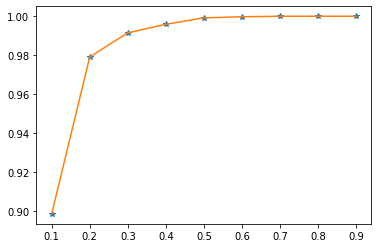

In [ ]:
list_threshold=np.arange(0,11)/10
scores=[]
list_threshold_=[]

for Threshold in list_threshold:
  data = score_innovation()
  data['innovation']=data['innovation'].apply(classification_innovation)

  y=data.innovation.values
  X_train, X_val, Y_train, Y_val = train_test_split (tf_idf, y, test_size = 0.30, random_state = 40) 
  try:
    model=LogisticRegression()
    model.fit(X_train, Y_train)
    s=model.score(X_val, Y_val)
    scores.append(s)
    list_threshold_.append(Threshold)
  except:
    pass


plt.plot(list_threshold_, scores,'*', list_threshold_, scores)
plt.show()

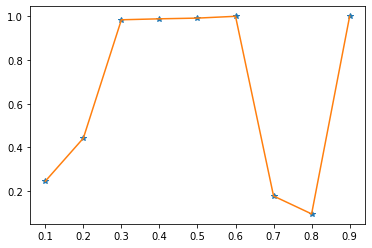

In [ ]:
list_threshold=np.arange(0,11)/10
scores=[]
list_threshold_=[]

for Threshold in list_threshold:
  data = score_innovation()
  data['innovation']=data['innovation'].apply(classification_innovation)

  y=data.innovation.values
  X_train, X_val, Y_train, Y_val = train_test_split (tf_idf, y, test_size = 0.30, random_state = 40) 
  try:
    model=LinearSVC()
    model.fit(X_train, Y_train)
    s=model.score(X_val, Y_val)
    scores.append(s)
    list_threshold_.append(Threshold)
  except:
    pass


plt.plot(list_threshold_, scores,'*', list_threshold_, scores)
plt.show()